# 探索数据集项目

#### 本报告将探索泰坦尼克号旅客信息，来确定旅客的哪些特征可以更好地预测一个人是否会生还。

### 1. 数据读取和观察
首先，读入数据并初始数据和属性。

In [1]:
import numpy as np
import pandas as pd

# 数据可视化代码
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

# 加载数据集
rfile = 'titanic-data.csv'
data = pd.read_csv(rfile)

# 显示数据列表中的前几项乘客数据
display(data.head())
print data.shape

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

(891, 12)


In [2]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

根据[Kaggle网站](https://www.kaggle.com/c/titanic/data)对泰坦尼克原始数据的属性描述，船上乘客的特征如下：

- Survived：是否存活（0代表没存活，1代表存活）
- Pclass：代表社会经济地位（个人理解表示船舱等级更好理解？不确定）
- Name：乘客的姓名
- Sex：乘客的性别
- Age：乘客的年龄
- SibSp：乘客一起上船的兄弟姐妹和配偶的数量
- Parch：乘客一起上船的父母以及小孩的数量
- Ticket：船票的编号
- Fare：船票的费用
- Cabin：乘客所在船舱的编号
- Embarked：乘客登船的港口（C表示从 Cherbourg 登船，Q表示从 Queenstown 登船，S表示从 Southampton 登船）




In [3]:
# view data info by column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


可以看出数据存在缺失，总共有891个乘客的数据，**Age**只有714条有效数据，其余为NaN（无记录），**Cabin** 只有204条有效数据，**Embarked** 也有两条无效。

In [4]:
# view source data's statistics
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

然后，我们得到数值型数据的一些统计信息(其他属性，比如姓名是文本型，比如性别／登船港口，是类目型，没有统计信息)。

`mean` 字段告诉我们，最后大概 38% 的人生还了，在有年龄记录的乘客中平均年龄大概是 29.7 岁，**Pclass** 是2或3的人比1的人多。

### 2. 画图观察数据的分布
首先，看一下乘客中生还者和死亡者的人数分布比例：

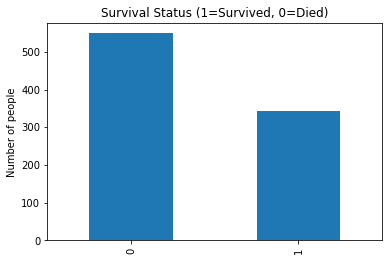

In [5]:
# plot the distribution of 'Survived'
data.Survived.value_counts().plot(kind='bar')
plt.title("Survival Status (1=Survived, 0=Died)")
plt.ylabel("Number of people")
plt.show()

由此看出一个不幸的事实：死亡乘客远多于生还者。



记得泰坦尼克电影情节里在上救生艇的时候妇女和儿童先走，

所以先看一下生还与否和乘客年龄的散点图，看看能不能发现关联：

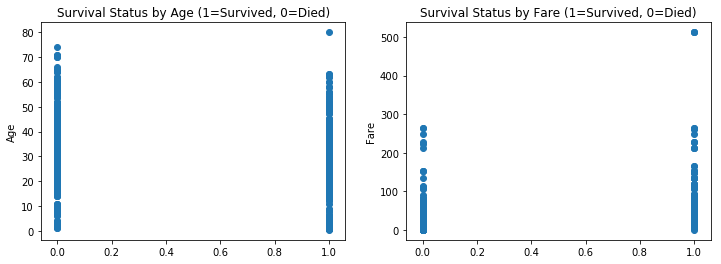

In [6]:
fig = plt.figure(figsize=(12,4))

fig.add_subplot(121)
plt.scatter(data.Survived, data.Age)
plt.ylabel("Age")
plt.title("Survival Status by Age (1=Survived, 0=Died)")

fig.add_subplot(122)
plt.scatter(data.Survived, data.Fare)
plt.ylabel("Fare")
plt.title("Survival Status by Fare (1=Survived, 0=Died)")
plt.show()

并没有看出生还与否和乘客年龄分布有什么明显关系。

另外，好奇船票的费用是否跟生还与否有关，但是也没有看出明显特征，除了船票费用极高的个别人。

然后，看一下生还与否和性别／船舱等级／登船口的分布关系：



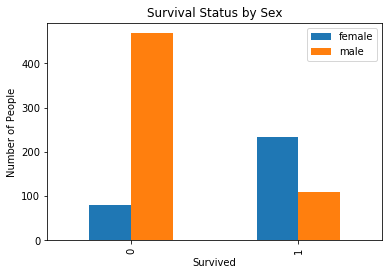

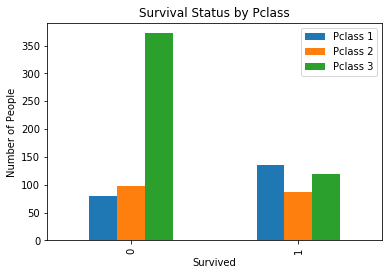

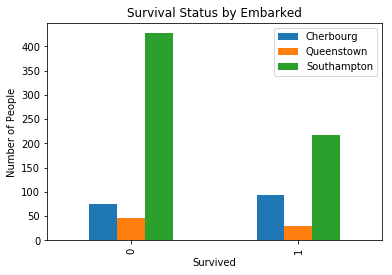

In [7]:
survived_m = data.Survived[data.Sex == 'male'].value_counts()
survived_f = data.Survived[data.Sex == 'female'].value_counts()
df1 = pd.DataFrame({'male':survived_m, 'female':survived_f})
df1.plot(kind='bar')
plt.title("Survival Status by Sex")
plt.xlabel("Survived") 
plt.ylabel("Number of People")
plt.show()


survived_1 = data.Survived[data.Pclass == 1].value_counts()
survived_2 = data.Survived[data.Pclass == 2].value_counts()
survived_3 = data.Survived[data.Pclass == 3].value_counts()
df2 = pd.DataFrame({'Pclass 1':survived_1, 'Pclass 2':survived_2, 'Pclass 3':survived_3})
df2.plot(kind='bar')
plt.title("Survival Status by Pclass")
plt.xlabel("Survived") 
plt.ylabel("Number of People")
plt.show()

survived_C = data.Survived[data.Embarked == 'C'].value_counts()
survived_Q = data.Survived[data.Embarked == 'Q'].value_counts()
survived_S = data.Survived[data.Embarked == 'S'].value_counts()
df3 = pd.DataFrame({'Cherbourg':survived_C, 'Queenstown':survived_Q, 'Southampton':survived_S})
df3.plot(kind='bar')
plt.title("Survival Status by Embarked")
plt.xlabel("Survived") 
plt.ylabel("Number of People")
plt.show()

至此，我们发现女性生还率远高于男性，性别可能是一个决定生还与否的比较重要的因素；1等舱的乘客生还的比例也明显高于2&3等舱的人；登船口也有些信息，从Cherbourg登船的人生还人数多于遇难人数，其他俩港口都是遇难人数比例大。

### 3. 计算与探索

画图观察先告一段落，下面引入预测**准确率**，即我们根据乘客属性预测一个乘客生还与否的正确比例。(由于做过进阶课程的p0，此处准确率引入是受那个项目的启发)

首先，从数据中分离目标属性 **Survived** 这一列，并将它存储在变量 `dest` 中做为我们要预测的目标。

In [8]:
# 从数据集中移除 'Survived' 这个特征，
dest = data['Survived']
sdata = data.drop('Survived', axis = 1)

# 显示已移除 'Survived' 特征的数据集
display(sdata.head())
print sdata.shape

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

(891, 11)




**定义准确率函数：**


In [9]:
def accuracy_score(truth, pred):
    if len(truth) == len(pred): 
        # 计算预测准确率（百分比）
        return "The accuracy is {:.2f}%.".format((truth == pred).mean()*100)
    else:
        return "Number of predictions ！= number of outcomes!"


### 初始预测

由前面查看的数据统计信息和对乘客生还与否的可视化，大部分乘客都遇难了，可以做“乘客全部未生还”的初始预测。  

In [10]:
def p0(data):
    predictions = []
    for _, passenger in data.iterrows():
        # 所有乘客全部遇难
        predictions.append(0)
    
    return pd.Series(predictions)

# 预测和准确率
predictions = p0(sdata)
print accuracy_score(dest, predictions)

The accuracy is 61.62%.


对比真实的泰坦尼克号的数据，如果做一个所有乘客都没有存活的预测，这个预测的准确率能达到61.62%.



### 考虑性别特征的影响

由之前对性别和生还者人数的分布图可以看出，女性大部分都生还；所以预测女性全部生还，男性全部遇难，看看准确率是多少。


In [11]:
def p1(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # 预测如果是女性则生还
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

# 预测和准确率
predictions = p1(sdata)
print accuracy_score(dest, predictions)

The accuracy is 78.68%.


当我们预测船上女性乘客全部存活，而剩下的人全部遇难，那么我们预测的准确率会达到78.68%，准确率大大提高！



从性别这个切入点，接下来看一下生还的女性中，其他属性对生还情况的影响，主要是想找出什么属性的女性更多比例的遇难了。首先想到的是阶级 **Pclass** ：

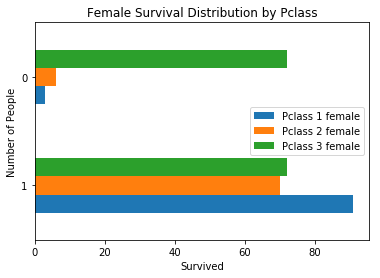

In [12]:

survived_f_1 = data.Survived[data.Sex == 'female'][data.Pclass == 1].value_counts()
survived_f_2 = data.Survived[data.Sex == 'female'][data.Pclass == 2].value_counts()
survived_f_3 = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
df4 = pd.DataFrame({'Pclass 1 female':survived_f_1, 'Pclass 2 female':survived_f_2, 'Pclass 3 female':survived_f_3})
df4.plot(kind='barh')
plt.legend(loc='best')
plt.title("Female Survival Distribution by Pclass")
plt.xlabel("Survived") 
plt.ylabel("Number of People")
plt.show()

由分布图可以看出，1&2等舱的乘客几乎都生还了，3等舱乘客生还和遇难人数一半一半（看来还可以继续拆分）。

根据上述情况，再来看一下3等舱的女性的其他属性和生还率的关系吧。上面画过登船口与生还与否的关系，下面来看看这个属性在3等舱的女性乘客的分布对生还与否的影响。

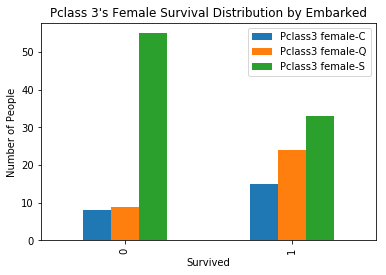

In [13]:
survived_f_3C = data.Survived[data.Sex == 'female'][data.Pclass == 3][data.Embarked == 'C'].value_counts()
survived_f_3Q = data.Survived[data.Sex == 'female'][data.Pclass == 3][data.Embarked == 'Q'].value_counts()
survived_f_3S = data.Survived[data.Sex == 'female'][data.Pclass == 3][data.Embarked == 'S'].value_counts()
df3 = pd.DataFrame({'Pclass3 female-C':survived_f_3C, 'Pclass3 female-Q':survived_f_3Q, 'Pclass3 female-S':survived_f_3S})
df3.plot(kind='bar')
plt.title("Pclass 3's Female Survival Distribution by Embarked")
plt.xlabel("Survived") 
plt.ylabel("Number of People")
plt.show()

由图看出，如果女性在3等舱，从 C、Q 登船的存活的多余遇难的，而从 S 登船的人遇难的比例大。

由此我们给出了以下预测方法：

In [14]:
def p2(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger["Sex"] == "female":
            # 1&2等舱女性预测为生还
            if passenger["Pclass"] == 1 or passenger["Pclass"] == 2:
                predictions.append(1)
            # 3等舱女性，在 C、Q登船的预测为生还，S 登船的预测为遇难
            else:
                if passenger["Embarked"] == "C" or passenger["Embarked"] == "Q":
                    predictions.append(1)
                else:
                    predictions.append(0)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

# 预测和准确率
predictions = p2(sdata)
print accuracy_score(dest, predictions)

The accuracy is 81.14%.


预测准确率达到了81.14%，又高了很多！



下面在研究一下男性，目的是找出哪些属性的男性更易存活：

首先看船舱等级，

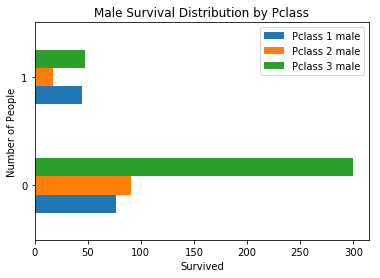

In [15]:
survived_m_1 = data.Survived[data.Sex == 'male'][data.Pclass == 1].value_counts()
survived_m_2 = data.Survived[data.Sex == 'male'][data.Pclass == 2].value_counts()
survived_m_3 = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
df4 = pd.DataFrame({'Pclass 1 male':survived_m_1, 'Pclass 2 male':survived_m_2, 'Pclass 3 male':survived_m_3})
df4.plot(kind='barh')
plt.legend(loc='best')
plt.title("Male Survival Distribution by Pclass")
plt.xlabel("Survived") 
plt.ylabel("Number of People")
plt.show()

然而不管是那个等级的男性，遇难者都比生还者多。

再看看年龄吧，由于年龄数据不全存在NaN，这里将数据缺失项移除。

(453, 12)


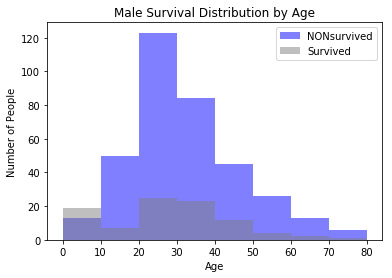

In [16]:

survived_m = data[data.Sex == 'male'].reset_index(drop = True)
curr_data = survived_m[~np.isnan(survived_m.Age)]
print curr_data.shape

bins = np.arange(0, curr_data['Age'].max() + 10, 10)

svv = curr_data[curr_data.Survived==1]['Age'].reset_index(drop = True)
non_svv = curr_data[curr_data.Survived==0]['Age'].reset_index(drop = True)
plt.hist(non_svv, bins = bins, color = 'blue', label = 'NONsurvived', alpha = 0.5)
plt.hist(svv, bins = bins, alpha = 0.5, color = 'grey', label = 'Survived')
plt.title("Male Survival Distribution by Age")
plt.xlabel("Age") 
plt.ylabel("Number of People")
plt.legend(loc='best')
plt.show()


根据男性年龄直方分布图可以看出，10岁以下的男性生还者多于遇难者。

因此增加预测条件，预测男性年龄小于十岁的人生还，其余遇难，准确率又提升了一些。

In [18]:
def p3(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger["Sex"] == "female":
            # 1&2等舱女性预测为生还
            if passenger["Pclass"] == 1 or passenger["Pclass"] == 2:
                predictions.append(1)
            # 3等舱女性，在 C、Q登船的预测为生还，S 登船的预测为遇难
            else:
                if passenger["Embarked"] == "C" or passenger["Embarked"] == "Q":
                    predictions.append(1)
                else:
                    predictions.append(0)
        else:
            # 男性10岁以下预测为生还
            if passenger["Age"] < 10.0:
                predictions.append(1)
            else:
                predictions.append(0)
    
    return pd.Series(predictions)

# 预测和准确率
predictions = p3(sdata)
print accuracy_score(dest, predictions)

The accuracy is 81.82%.


### 4. 暂时性的结论

根据上述所有的统计和分析来看，1/2等舱、在 C、Q 登船的女性和年龄在10岁以下的男性的生还率更高，不过这个结论只是暂时的，并没有一一探寻每个属性的相互关联性以及他们的组合可能对生还率的影响，还有很多改进空间。




